In [ ]:
# Web scraping involves extracting data from websites. In this assignment,
# you will web scrape basketball statistics from Wikipedia of some of the greatest basketball players.
# You will perform some analysis on the data using Pandas, plot,
# data answer some basic questions then store the data on IBM cloud.

# in this section, we define the function get_basketball_stats. The function will return a dictionary
# corresponding to the Regular season statistics of each basketball player scraped from m en.wikipedia.org.
# The Formal Parameter or input  link is going to be the URL of the Wikipedia page for each player.
# This function will return a Python dictionary. The keys will be the column names,
# and the values will be a list that contains a different columns; the element of each list will be
# a separate row for that column



In [3]:
import bs4
import requests
import pandas as pd
import numpy as np
import boto3


ModuleNotFoundError: No module named 'boto3'

In [4]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
    # read the webpage
    response = requests.get(link)
    # create a BeautifulSoup object to parse the HTML  
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable';
    #therefore we create a tag object "table"
    table=soup.find(class_='wikitable sortable')

    #the headers of the table are the first table row (tr) we create a tag object that has the first row  
    headers=table.tr
    #the table column names are displayed  as an abbreviation; therefore we find all the abbr tags and returns an Iterator
    titles=headers.find_all("abbr")
    #we create a dictionary  and pass the table headers as the keys
    data = {title['title']:[] for title in titles}
   #we will store each column as a list in a dictionary, the header of the column will be the dictionary key

    #we iterate over each table row by fining each table tag tr and assign it to the object
    for row in table.find_all('tr')[1:]:
    
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the corresponding key corresponding the column n
        for key,a in zip(data.keys(),row.find_all("td")[2:]):
            # we append each element and strip any extra HTML contnet
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == ".")))

    # we remove extra rows by finding the smallest list	 
    Min=min([len(x)  for x in data.values()])
    #we convert the elements in the key to floats
    for key in data.keys():
    
        data[key]=list(map(lambda x: float(x), data[key][:Min]))
  
    return data


In [5]:
# Question 1: Web Scraping the data and Converting to Pandas Dataframe
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# The list links contain the link the Wikipedia article for each player.
# The list names contains the names of each player.

links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
   ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
  ,'https://en.wikipedia.org/wiki/LeBron_James'\
  
  ,'https://en.wikipedia.org/wiki/Stephen_Curry']
names=['Michael Jordan','Kobe Bryant','Lebron James','Stephen Curry']


In [ ]:
# You can use the function get_basketball_stats to extract the Regular season table and store it to a Python dictionary. For example,
# you can extract the table for Michael Jordan and convert it to a Python dictionary as follows:

#links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
 #  ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
 # ,'https://en.wikipedia.org/wiki/LeBron_James'\
  
#  ,'https://en.wikipedia.org/wiki/Stephen_Curry']
# names=['Michael Jordan','Kobe Bryant','Lebron James','Stephen Curry']


In [6]:
#using the link

Michael_jordan_dict=get_basketball_stats('https://en.wikipedia.org/wiki/Michael_Jordan')
Kobe_Bryant_dict=get_basketball_stats('https://en.wikipedia.org/wiki/Kobe_Bryant')
LeBron_James_dict=get_basketball_stats('https://en.wikipedia.org/wiki/LeBron_James')

Stephen_Curry_dict=get_basketball_stats('https://en.wikipedia.org/wiki/Stephen_Curry')


#using the list

#Michael_jordan_dict=get_basketball_stats(links[0])
# Kobe_Bryant_dict=get_basketball_stats( link[1])

a = [pd.DataFrame(Michael_jordan_dict),pd.DataFrame(Kobe_Bryant_dict),
  pd.DataFrame(LeBron_James_dict),pd.DataFrame(Stephen_Curry_dict)]

# For the long way
#df_Michael=pd.DataFrame(Michael_jordan_dict)
#df_Kobe=pd.DataFrame(Kobe_Bryant_dict)
#df_LeBron=pd.DataFrame(LeBron_James_dict)
#df_Stephen=pd.DataFrame(Stephen_Curry_dict)
#a = [df_Michael,df_Kobe,df_LeBron,df_Stephen]


In [7]:
for i in names:
    print(i)
    display(a[names.index(i)].iloc[0:5,0:5])  # ****First 5 rows and first 5 columns
    
      # df.iloc[0:5,0:5] to get first 5 rows and first 5 columns
    
    # Another way:
   # if i== "Michael Jordan":
   	# print("Michael Jordan" )
        #display(df_Michael.head())
           	 
    #elif i== 'Kobe Bryant':
        #print("Kobe Bryant" )
        #display(df_Kobe.head())
                   	 
    #elif i == 'Lebron James':
        #print("Lebron James"  )
        #display(df_LeBron.head())
    #else:
        #print("Stephen Curry" )
        #display(df_Stephen.head())


Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage
0,82.0,82.0,38.3,0.515,0.173
1,18.0,7.0,25.1,0.457,0.167
2,82.0,82.0,40.0,0.482,0.182
3,82.0,82.0,40.4,0.535,0.132
4,81.0,81.0,40.2,0.538,0.276


Kobe Bryant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage
0,71.0,6.0,15.5,0.417,0.375
1,79.0,1.0,26.0,0.428,0.341
2,50.0,50.0,37.9,0.465,0.267
3,66.0,62.0,38.2,0.468,0.319
4,68.0,68.0,40.9,0.464,0.305


Lebron James


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage
0,79.0,79.0,39.5,0.417,0.290
1,80.0,80.0,42.4,0.472,0.351
2,79.0,79.0,42.5,0.480,0.335
3,78.0,78.0,40.9,0.476,0.319
4,75.0,74.0,40.4,0.484,0.315


Stephen Curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage
0,80.0,77.0,36.2,0.462,0.437
1,74.0,74.0,33.6,0.480,0.442
2,26.0,23.0,28.2,0.490,0.455
3,78.0,78.0,38.2,0.451,0.453
4,78.0,78.0,36.5,0.471,0.424


Text(0, 0.5, 'Points per game')

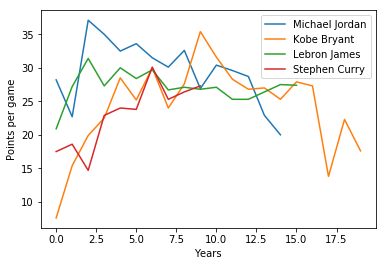

In [8]:
#  Question 2: plot the Points per game for a player using the function plt.plot().

# Import the plotting library

import matplotlib.pyplot as plt

#plt.plot(df_Michael['Points per game'],label= 'Michael Jordan')  # for one player
#plt.legend()
#plt.xlabel('years')
#plt.ylabel('Points per game')

index = 0
for x in a:   # for all players 
    plt.plot(x['Points per game'],label = names[index])
    plt.legend()
    index += 1
plt.xlabel("Years")
plt.ylabel("Points per game")



Text(0, 0.5, 'Points per game')

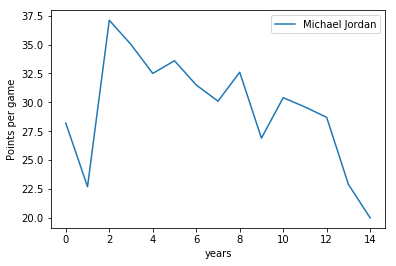

In [10]:
# Plot Michael Jordan
df_Michael=pd.DataFrame(Michael_jordan_dict)
plt.plot(df_Michael['Points per game'],label= 'Michael Jordan')  # for one player
plt.legend()
plt.xlabel('years')
plt.ylabel('Points per game')
